In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def template_match(image, template, methods):
  result_list = []
  w, h = template.shape[::-1]  

  for method in methods:
    copy = image.copy()
    method = eval(method)
    result = cv2.matchTemplate(copy, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      top_left = min_loc
    else:
      top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(copy, top_left, bottom_right, 255, 2)

    result_list.append(copy)

  return result_list

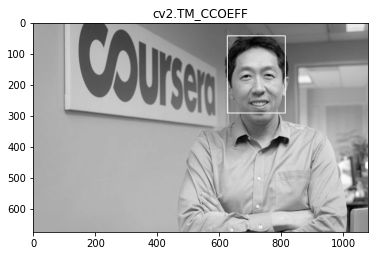

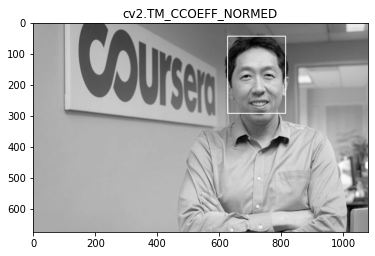

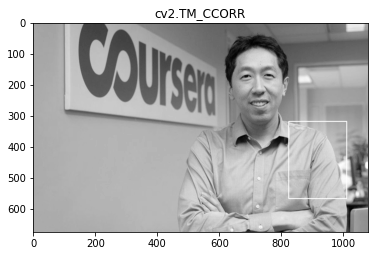

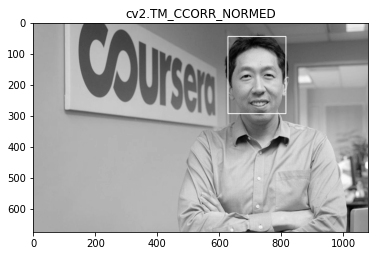

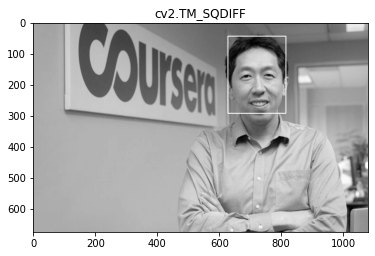

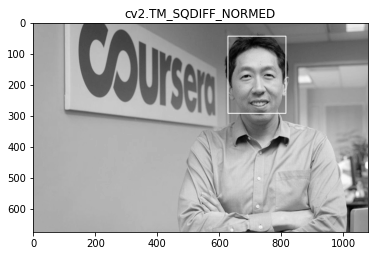

In [21]:
template = cv2.imread('/content/template.png', 0)
image = cv2.imread('/content/original.png', 0)

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

result_list = template_match(image, template, methods)

for i in range(len(result_list)):
  plt.title(methods[i])
  plt.imshow(result_list[i], cmap='gray')
  plt.show()

  print("\n")